# Import and preprocess data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# show all columns
pd.set_option('display.max_columns', None)
# show all rows
pd.set_option('display.max_rows', None) 

In [3]:
# wb = pd.read_excel('ML-Model.xlsx', sheet_name=None, index_col=0, comment='#')
wb = pd.read_excel('8MR-ML-Model.xlsx', sheet_name=None, index_col=0, comment='#')
wb["Cages"] = wb["Cages"].dropna(axis=0, how="all").dropna(axis=1, how="any")

In [4]:
listcage = [wb["Cages"]] * wb["NH3"].shape[1]
cages7 = pd.concat(listcage, axis=0)
NH3unstack = wb["NH3"].unstack()
cages7.index = NH3unstack.index
data = pd.concat([cages7, NH3unstack], axis=1)
data.rename(columns={0:"NH3"}, inplace=True)
y = wb["TS"].unstack()
if 'Slope' in data.columns:
    del data["Slope"]

### Standardization
Don't cheat - fit only on training data \
"fit" Compute the mean and std to be used for later scaling \
apply same transformation to test data \
test data transformation uses mean and std that are computed by training data \
this way is better than scale the whole data, theorically

In [5]:
# from sklearn import preprocessing
# X = preprocessing.scale(data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# # recover normalized data
# raw_data_train = scaler.inverse_transform(X_train)
# raw_data_test = scaler.inverse_transform(X_test)

<AxesSubplot:>

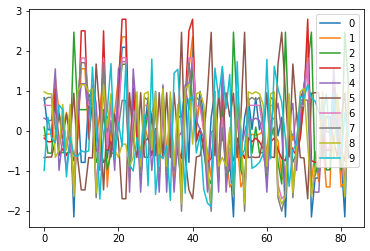

In [8]:
pd.DataFrame(X_train).plot()

<AxesSubplot:>

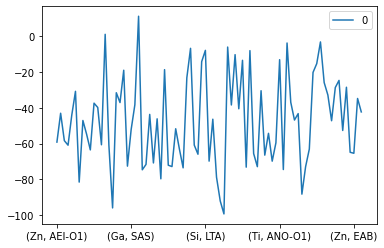

In [9]:
pd.DataFrame(y_train).plot()

In [10]:
print("X_train -> ", X_train.shape)
print("X_test -> ", X_test.shape)
print("y_train -> ", y_train.shape)
print("y_test -> ", y_test.shape)

X_train ->  (83, 10)
X_test ->  (36, 10)
y_train ->  (83,)
y_test ->  (36,)


# feature selection

<img src="https://pic3.zhimg.com/80/v2-e98197d5c976879e1515c078a3134512_720w.jpg"  alt="ImageFile" style="width: 800px;" align="left"/>

## Filter

### 方差选择法
Variance Selection :joy:

In [ ]:
from sklearn.feature_selection import VarianceThreshold

VarianceThreshold(threshold=3).fit_transform(iris.data)

### 相关系数法

### 卡方检验
Chi-Square

### 互信息法
计算各个特征的信息增益 Linear Discriminant Analysis (LDA，线性判别分析)

## Wrapper

Recursive feature elimination (递归特征消除法)

完全搜索(穷举)

我们数据少，可以穷举。

## Embedded

### 基于惩罚项

基于惩罚项的特征选择法

Lasso and Ridge are done in section Fit Medthod.

### 基于树模型

基于树模型的特征选择法

# Fit Methods

## Linear Regression

In [ ]:
# from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

In [57]:
model = LinearRegression().fit(X_train, y_train)

In [58]:
cv = cross_validate(LinearRegression(), X, y, cv=10,
                    scoring=('r2', 'neg_mean_squared_error'),
                    return_train_score=True)
cv

{'fit_time': array([0.00172973, 0.00070429, 0.00078106, 0.00094676, 0.00062156,
        0.00061226, 0.00059152, 0.00063705, 0.00099468, 0.00105119]),
 'score_time': array([0.00062752, 0.00039291, 0.00053787, 0.00056529, 0.00042963,
        0.00035286, 0.00035524, 0.00037742, 0.00055623, 0.00053096]),
 'test_r2': array([0.88777538, 0.96681664, 0.91353835, 0.92664061, 0.97406616,
        0.79183105, 0.91357855, 0.84625499, 0.86516607, 0.76803313]),
 'train_r2': array([0.97435449, 0.97210606, 0.97193068, 0.96743939, 0.9716025 ,
        0.97235433, 0.97373786, 0.9758909 , 0.97545679, 0.9759309 ]),
 'test_neg_mean_squared_error': array([-15.78660757,  -5.87760224, -16.81900711, -11.04412494,
        -27.14435748, -26.75548291, -16.13568268, -25.86130666,
        -21.71379449, -22.99114808]),
 'train_neg_mean_squared_error': array([-16.61066036, -17.67524993, -16.56994092, -17.16802368,
        -15.43514258, -15.64242491, -16.69725936, -15.48972927,
        -16.07173682, -15.9634689 ])}

In [59]:
cvs = cross_val_score(LinearRegression(), X, y, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs.mean(), cvs.std() * 2))

Accuracy: 0.89 (+/- 0.13)


In [60]:
train_sizes

NameError: name 'train_sizes' is not defined

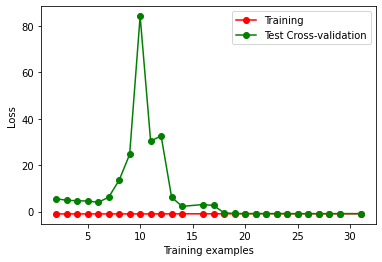

In [61]:
train_sizes, train_loss, test_loss = learning_curve(
                                        LinearRegression(), X, y, cv=10, scoring='r2',
                                        train_sizes=np.arange(0.02, 0.3, 0.01))
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Test Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")

In [62]:
y_predict = model.predict(X_test)
score = r2_score(y_test, y_predict)
score

0.9739391504794193

In [63]:
model.score(X_train, y_train)

0.9712158997039249

In [64]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [65]:
model.coef_

array([  3.83695694,  -3.1275152 ,   1.228779  ,  17.56670627,
        -4.11079421, -13.75340964, -17.5195656 , -11.03886146,
        13.88658965,  22.0652095 ])

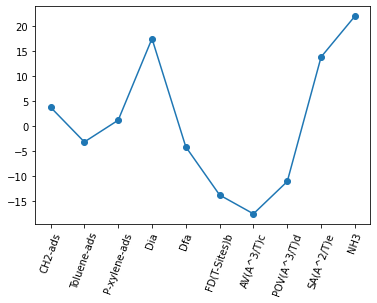

In [66]:
_ = plt.plot(range(model.coef_.size), model.coef_, "o-")
_ = plt.xticks(list(range(data.columns.values.size)), data.columns.values, rotation=70)

In [67]:
model.intercept_

-46.34892193565358

In [68]:
y_predict

array([ -55.48802914,  -43.94037378,  -48.57100704,   -4.06748895,
        -56.36013434,  -74.17040604,  -70.20827203,  -13.47443109,
       -103.55791643,  -34.89709401,  -36.13892721,  -80.78997249,
        -19.95152222,  -51.22904237,  -38.02881994,  -33.1222274 ,
        -49.11076733,  -59.17452012,  -86.2964297 ,   -6.25901061,
        -51.96619235,  -43.12221913,   -1.23042105,  -78.96479707,
        -44.15919978,  -88.75653486,  -23.22092256,  -63.71542346,
        -23.92164784,  -55.14211848,  -18.38482452,  -24.73598442,
         -7.36333648,  -69.00485518,  -11.05095731,  -59.58629093])

In [69]:
y_test.values

array([-58.32488721, -52.11170667, -43.6681729 ,  -0.78167566,
       -58.73740143, -79.6338365 , -74.58772864, -10.30642467,
       -99.2296777 , -38.28015104, -34.77532252, -73.12632079,
       -23.22452791, -51.66440661, -36.88545121, -30.78562063,
       -50.95721374, -54.7551704 , -90.22448081,  -8.06616143,
       -52.63778505, -50.24923935,  -3.20367764, -75.60654683,
       -43.01907769, -80.16814121, -22.75258453, -56.14447767,
       -23.95562983, -60.85872241, -18.67720563, -18.58282178,
        -6.0680213 , -70.76482474,  -6.77396854, -55.48961553])

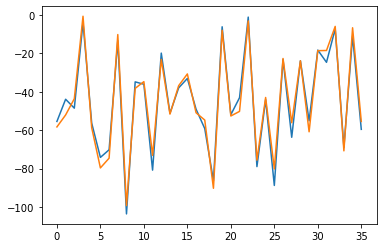

In [70]:
plt.plot(y_predict)
plt.plot(y_test.values)

## Lasso

In [14]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

### tune parameters

alpha: 0.0001
alpha: 0.00011
alpha: 0.00012
alpha: 0.00013000000000000002
alpha: 0.00014
alpha: 0.00015000000000000001
alpha: 0.00015999999999999999
alpha: 0.00017
alpha: 0.00017999999999999998
alpha: 0.00019
alpha: 0.00019999999999999998
alpha: 0.00021
alpha: 0.00021999999999999998
alpha: 0.00023
alpha: 0.00023999999999999998
alpha: 0.00025
alpha: 0.00026
alpha: 0.00027
alpha: 0.00028
alpha: 0.00029
alpha: 0.0003
alpha: 0.00031
alpha: 0.00031999999999999997
alpha: 0.00033
alpha: 0.00033999999999999997
alpha: 0.00035
alpha: 0.00035999999999999997
alpha: 0.00036999999999999994
alpha: 0.00037999999999999997
alpha: 0.00039
alpha: 0.00039999999999999996
alpha: 0.00040999999999999994
alpha: 0.00041999999999999996
alpha: 0.00043
alpha: 0.00043999999999999996
alpha: 0.00044999999999999993
alpha: 0.00045999999999999996
alpha: 0.00047
alpha: 0.00047999999999999996
alpha: 0.00049
alpha: 0.0005
alpha: 0.00051
alpha: 0.00052
alpha: 0.00053
alpha: 0.00054
alpha: 0.00055
alpha: 0.00056
alpha: 0.0005

Text(0, 0.5, 'Cross-Validated Accuracy')

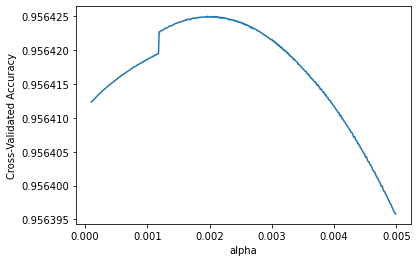

In [38]:
lasso = Lasso(max_iter=10000)
alpha_range = np.arange(0.0001, 0.005, 0.00001)
r2_scores = []
for alpha in alpha_range:
    print("alpha:", alpha)
    lasso.set_params(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

plt.plot(alpha_range, r2_scores)
plt.xlabel('alpha')
plt.ylabel('Cross-Validated Accuracy')

In [47]:
# value of alpha
alpha_range[pd.DataFrame(r2_scores).idxmax().values]

array([0.00197])

### Train

In [48]:
lasso = Lasso(alpha=0.00197, max_iter=10000)
model = lasso.fit(X_train, y_train)

print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(model.score(X_test, y_test)))
print("Number of features used: ", np.sum(model.coef_ != 0))

Training set score: 0.97
Testing set score: 0.97
Number of features used:  10


In [49]:
model.coef_

array([  2.55255506,  -3.14349891,   1.64955551,  14.63789154,
        -2.52393757, -13.95812425, -11.29670792, -17.20733371,
        15.90836571,  20.64607764])

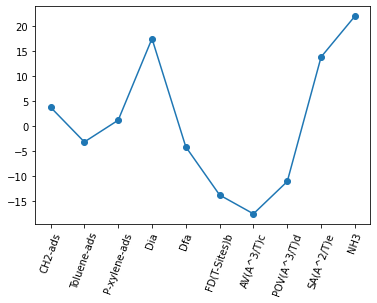

In [71]:
# pd.DataFrame(model.coef_).plot()

_ = plt.plot(range(model.coef_.size), model.coef_, "o-")
_ = plt.xticks(list(range(data.columns.values.size)), data.columns.values, rotation=70)

## Elastic-Net

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

### tune parameters

#### tune alpha

alpha: 1e-05
alpha: 2e-05
alpha: 3.0000000000000004e-05
alpha: 4e-05
alpha: 5e-05
alpha: 6e-05
alpha: 7.000000000000001e-05
alpha: 8e-05
alpha: 9e-05
alpha: 0.0001
alpha: 0.00011
alpha: 0.00012
alpha: 0.00013000000000000002
alpha: 0.00014000000000000001
alpha: 0.00015000000000000001
alpha: 0.00016
alpha: 0.00017
alpha: 0.00018
alpha: 0.00019
alpha: 0.0002
alpha: 0.00021
alpha: 0.00022
alpha: 0.00023
alpha: 0.00024
alpha: 0.00025000000000000006
alpha: 0.00026000000000000003
alpha: 0.00027000000000000006
alpha: 0.00028000000000000003
alpha: 0.00029000000000000006
alpha: 0.00030000000000000003
alpha: 0.00031000000000000005
alpha: 0.00032
alpha: 0.00033000000000000005
alpha: 0.0003400000000000001
alpha: 0.00035000000000000005
alpha: 0.0003600000000000001
alpha: 0.00037000000000000005
alpha: 0.0003800000000000001
alpha: 0.00039000000000000005
alpha: 0.0004000000000000001
alpha: 0.00041000000000000005
alpha: 0.00042000000000000007
alpha: 0.00043000000000000004
alpha: 0.00044000000000000007
a

Text(0, 0.5, 'Cross-Validated Accuracy')

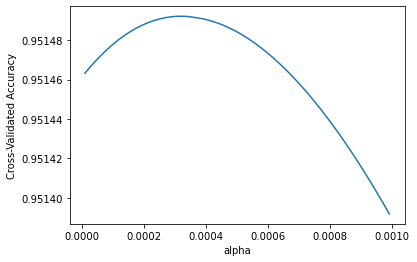

In [23]:
en = ElasticNet(max_iter=10000)
alpha_range = np.arange(0.00001, 0.001, 0.00001)
r2_scores = []
for alpha in alpha_range:
    print("alpha:", alpha)
    en.set_params(alpha=alpha)
    scores = cross_val_score(en, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

plt.plot(alpha_range, r2_scores)
plt.xlabel('alpha')
plt.ylabel('Cross-Validated Accuracy')

In [24]:
# value of alpha
alpha_range[pd.DataFrame(r2_scores).idxmax().values]

array([0.00032])

#### tune l1_ratio

l1: 0.1
l1: 0.11
l1: 0.12
l1: 0.13
l1: 0.13999999999999999
l1: 0.14999999999999997
l1: 0.15999999999999998
l1: 0.16999999999999998
l1: 0.17999999999999997
l1: 0.18999999999999995
l1: 0.19999999999999996
l1: 0.20999999999999996
l1: 0.21999999999999995
l1: 0.22999999999999995
l1: 0.23999999999999994
l1: 0.24999999999999992
l1: 0.2599999999999999
l1: 0.2699999999999999
l1: 0.2799999999999999
l1: 0.2899999999999999
l1: 0.29999999999999993
l1: 0.30999999999999994
l1: 0.3199999999999999
l1: 0.32999999999999985
l1: 0.33999999999999986
l1: 0.34999999999999987
l1: 0.3599999999999999
l1: 0.3699999999999999
l1: 0.3799999999999999
l1: 0.3899999999999999
l1: 0.3999999999999998
l1: 0.4099999999999998
l1: 0.4199999999999998
l1: 0.4299999999999998
l1: 0.43999999999999984
l1: 0.44999999999999984
l1: 0.45999999999999985
l1: 0.46999999999999986
l1: 0.47999999999999976
l1: 0.48999999999999977
l1: 0.4999999999999998
l1: 0.5099999999999998
l1: 0.5199999999999998
l1: 0.5299999999999998
l1: 0.5399999999999998

Text(0, 0.5, 'Cross-Validated Accuracy')

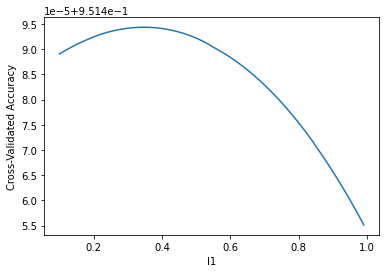

In [33]:
en = ElasticNet(alpha=0.00032, max_iter=10000)
l1_range = np.arange(0.1, 1.0, 0.01)
r2_scores = []
for l1 in l1_range:
    print("l1:", l1)
    en.set_params(l1_ratio=l1)
    scores = cross_val_score(en, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

plt.plot(l1_range, r2_scores)
plt.xlabel('l1')
plt.ylabel('Cross-Validated Accuracy')

In [30]:
# value of alpha
l1_range[pd.DataFrame(r2_scores).idxmax().values]

array([1.])

### Train

In [31]:
lasso = Lasso(alpha=0.00032, l1_ratio=1, max_iter=10000)
model = lasso.fit(X_train, y_train)

print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(model.score(X_test, y_test)))
print("Number of features used: ", np.sum(model.coef_ != 0))

NameError: name 'Lasso' is not defined

In [49]:
model.coef_

array([  2.55255506,  -3.14349891,   1.64955551,  14.63789154,
        -2.52393757, -13.95812425, -11.29670792, -17.20733371,
        15.90836571,  20.64607764])

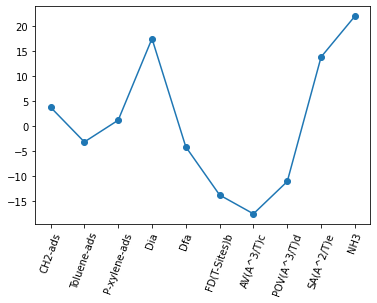

In [71]:
# pd.DataFrame(model.coef_).plot()

_ = plt.plot(range(model.coef_.size), model.coef_, "o-")
_ = plt.xticks(list(range(data.columns.values.size)), data.columns.values, rotation=70)

## Ridge Regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

### tune parameters

alpha: 0.01
alpha: 0.02
alpha: 0.03
alpha: 0.04
alpha: 0.05
alpha: 0.060000000000000005
alpha: 0.06999999999999999
alpha: 0.08
alpha: 0.09
alpha: 0.09999999999999999
alpha: 0.11
alpha: 0.12
alpha: 0.13
alpha: 0.14
alpha: 0.15000000000000002
alpha: 0.16
alpha: 0.17
alpha: 0.18000000000000002
alpha: 0.19
alpha: 0.2
alpha: 0.21000000000000002
alpha: 0.22
alpha: 0.23
alpha: 0.24000000000000002
alpha: 0.25
alpha: 0.26
alpha: 0.27
alpha: 0.28
alpha: 0.29000000000000004
alpha: 0.3
alpha: 0.31
alpha: 0.32
alpha: 0.33
alpha: 0.34
alpha: 0.35000000000000003
alpha: 0.36000000000000004
alpha: 0.37
alpha: 0.38
alpha: 0.39
alpha: 0.4
alpha: 0.41000000000000003
alpha: 0.42000000000000004
alpha: 0.43
alpha: 0.44
alpha: 0.45
alpha: 0.46
alpha: 0.47000000000000003
alpha: 0.48000000000000004
alpha: 0.49
alpha: 0.5
alpha: 0.51
alpha: 0.52
alpha: 0.53
alpha: 0.54
alpha: 0.55
alpha: 0.56
alpha: 0.5700000000000001
alpha: 0.5800000000000001
alpha: 0.59
alpha: 0.6
alpha: 0.61
alpha: 0.62
alpha: 0.63
alpha: 0.6

Text(0, 0.5, 'Cross-Validated Accuracy')

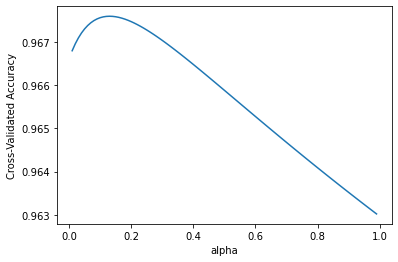

In [7]:
ridge = Ridge(max_iter=10000)
alpha_range = np.arange(0.01, 1.0, 0.01)
r2_scores = []
for alpha in alpha_range:
    print("alpha:", alpha)
    ridge.set_params(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

plt.plot(alpha_range, r2_scores)
plt.xlabel('alpha')
plt.ylabel('Cross-Validated Accuracy')

In [8]:
# value of alpha
alpha_range[pd.DataFrame(r2_scores).idxmax().values]

array([0.13])

### Train

In [9]:
ridge = Ridge(alpha=0.13, max_iter=10000)
model = ridge.fit(X_train, y_train)

print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(model.score(X_test, y_test)))
print("Number of features used: ", np.sum(model.coef_ != 0))

Training set score: 0.98
Testing set score: 0.96
Number of features used:  10


In [10]:
model.coef_

array([  4.14801973,  -2.66807779,   2.78000534,  16.91639529,
        -5.19069678,  -8.94072762, -14.90053788,  -6.88145558,
        11.85124576,  21.64255705])

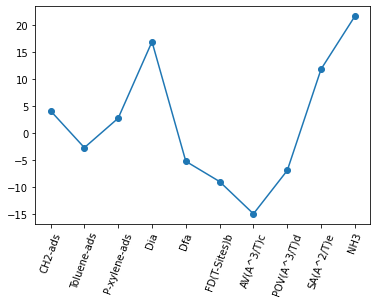

In [11]:
# pd.DataFrame(model.coef_).plot()

_ = plt.plot(range(model.coef_.size), model.coef_, "o-")
_ = plt.xticks(list(range(data.columns.values.size)), data.columns.values, rotation=70)

## SVR
Support Vector Machines:

Support Vector Regression & Support Vector Classification

In [29]:
pass

## Neural Network
have test multi-layer sizes

turns out the default hidden layer size = (100,) is best.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

# show all columns
pd.set_option('display.max_columns', None)
# show all rows
pd.set_option('display.max_rows', None) 

In [2]:
# wb = pd.read_excel('ML-Model.xlsx', sheet_name=None, index_col=0, comment='#')
wb = pd.read_excel('8MR-ML-Model.xlsx', sheet_name=None, index_col=0, comment='#')
wb["Cages"] = wb["Cages"].dropna(axis=0, how="all").dropna(axis=1, how="any")

In [3]:
listcage = [wb["Cages"]] * wb["NH3"].shape[1]
cages7 = pd.concat(listcage, axis=0)
NH3unstack = wb["NH3"].unstack()
cages7.index = NH3unstack.index
data = pd.concat([cages7, NH3unstack], axis=1)
data.rename(columns={0:"NH3"}, inplace=True)
y = wb["TS"].unstack()
if 'Slope' in data.columns:
    del data["Slope"]

### Standardization
Don't cheat - fit only on training data \
"fit" Compute the mean and std to be used for later scaling \
apply same transformation to test data \
test data transformation uses mean and std that are computed by training data \
this way is better than scale the whole data, theorically

In [4]:
# from sklearn import preprocessing
# X = preprocessing.scale(data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# # recover normalized data
# prediction_y = prediction*(y_max-y_min)+y_min

<AxesSubplot:>

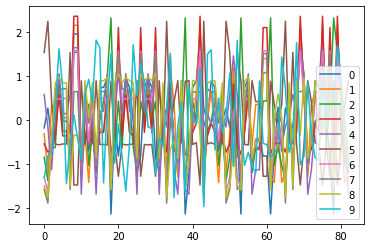

In [8]:
pd.DataFrame(X_train).plot()

<AxesSubplot:>

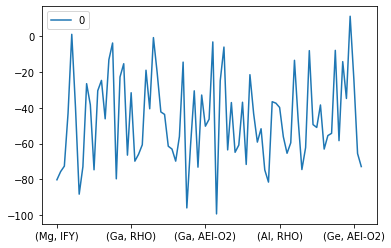

In [9]:
pd.DataFrame(y_train).plot()

In [10]:
print("X_train -> ", X_train.shape)
print("X_test -> ", X_test.shape)
print("y_train -> ", y_train.shape)
print("y_test -> ", y_test.shape)

X_train ->  (83, 10)
X_test ->  (36, 10)
y_train ->  (83,)
y_test ->  (36,)


In [11]:
# regr = MLPRegressor(hidden_layer_sizes=(100,), 
#                    activation="logistic",
#                    solver='sgd', 
#                    alpha=0.0001,
#                    batch_size='auto', 
#                    learning_rate="adaptive",
#                    learning_rate_init=0.001,
#                    power_t=0.5, 
#                    max_iter=100000,  # number of epochs
#                    momentum=0.9,
#                    random_state=1)  # random seed

# nn = regr.fit(X_train, y_train)

# y_predict = nn.predict(X_test)
# score = r2_score(y_test, y_predict)
# score

### Tune layer sizes
by cross validation (CV)

layers: (10,)
layers: (30,)
layers: (50,)
layers: (70,)
layers: (90,)
layers: (110,)
layers: (130,)
layers: (150,)
layers: (170,)
layers: (190,)
layers: (210,)
layers: (230,)
layers: (250,)
layers: (270,)
layers: (290,)


Text(0, 0.5, 'Cross-Validated Accuracy')

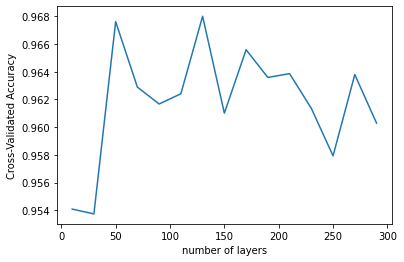

In [12]:
regr = MLPRegressor(hidden_layer_sizes=(100, 200), 
                   activation="relu",
                   solver='sgd', 
                   alpha=0.0001,
                   batch_size='auto', 
                   learning_rate="adaptive",
                   learning_rate_init=0.001,
                   power_t=0.5, 
                   max_iter=100000,  # number of epochs
                   momentum=0.9,
                   random_state=1)  # random seed

layer_range1 = range(10, 300, 20)
r2_scores1 = []
for i in layer_range1:
    print("layers:", (i,))
    regr.set_params(hidden_layer_sizes=(i,))
    scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
    r2_scores1.append(scores.mean())

plt.plot(layer_range1, r2_scores1)
plt.xlabel('number of layers')
plt.ylabel('Cross-Validated Accuracy')

In [13]:
for ele in zip(layer_range1, r2_scores1):
    print(ele)

(10, 0.9540926510022911)
(30, 0.9537439272658268)
(50, 0.9676161343239524)
(70, 0.9628932371587358)
(90, 0.961675679781413)
(110, 0.9624121778466075)
(130, 0.9680066037437614)
(150, 0.9610136074552844)
(170, 0.9655918696221084)
(190, 0.9635899906616217)
(210, 0.9638658334371819)
(230, 0.9613639546105135)
(250, 0.9579341692507548)
(270, 0.9637980431118344)
(290, 0.9602962436491478)


In [14]:
np.arange(10, 1000, 20).shape

(50,)

layers: (190, 10)
layers: (190, 30)
layers: (190, 50)
layers: (190, 70)
layers: (190, 90)
layers: (190, 110)
layers: (190, 130)
layers: (190, 150)
layers: (190, 170)
layers: (190, 190)
layers: (190, 210)
layers: (190, 230)
layers: (190, 250)
layers: (190, 270)
layers: (190, 290)


Text(0, 0.5, 'Cross-Validated Accuracy')

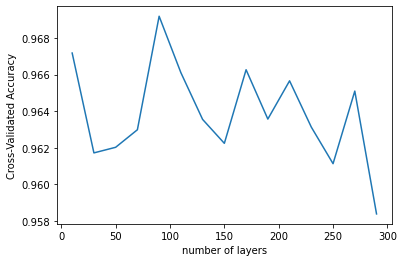

In [15]:
regr = MLPRegressor(hidden_layer_sizes=(190, 200), 
                   activation="relu",
                   solver='sgd', 
                   alpha=0.0001,
                   batch_size='auto', 
                   learning_rate="adaptive",
                   learning_rate_init=0.001,
                   power_t=0.5, 
                   max_iter=100000,  # number of epochs
                   momentum=0.9,
                   random_state=1)  # random seed

layer_range2 = range(10, 300, 20)
r2_scores2 = []
for i in layer_range2:
    print("layers:", (190, i))
    regr.set_params(hidden_layer_sizes=(190, i))
    scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
    r2_scores2.append(scores.mean())

plt.plot(layer_range2, r2_scores2)
plt.xlabel('number of layers')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
for ele in zip(layer_range2, r2_scores2):
    print(ele)

(10, 0.9671758365704136)
(30, 0.9617244408899672)
(50, 0.9620301292531579)
(70, 0.9629872854424626)
(90, 0.9691843187714302)
(110, 0.9661054599549901)
(130, 0.9635520570631291)
(150, 0.9622461852998929)
(170, 0.966263993478987)
(190, 0.9635714631037257)
(210, 0.9656581722960533)
(230, 0.9631319064186549)
(250, 0.9611356051903167)
(270, 0.9650984961037323)
(290, 0.9583929803042885)


layers: (10, 190)
layers: (30, 190)
layers: (50, 190)
layers: (70, 190)
layers: (90, 190)
layers: (110, 190)
layers: (130, 190)
layers: (150, 190)
layers: (170, 190)
layers: (190, 190)


Text(0, 0.5, 'Cross-Validated Accuracy')

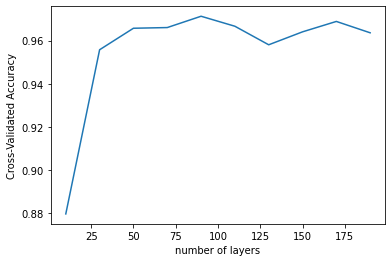

In [18]:
regr = MLPRegressor(hidden_layer_sizes=(190, 200), 
                   activation="relu",
                   solver='sgd', 
                   alpha=0.0001,
                   batch_size='auto', 
                   learning_rate="adaptive",
                   learning_rate_init=0.001,
                   power_t=0.5, 
                   max_iter=100000,  # number of epochs
                   momentum=0.9,
                   random_state=1)  # random seed

layer_range3 = range(10, 200, 20)
r2_scores3 = []
for i in layer_range3:
    print("layers:", (i, 190))
    regr.set_params(hidden_layer_sizes=(i, 190))
    scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
    r2_scores3.append(scores.mean())

plt.plot(layer_range3, r2_scores3)
plt.xlabel('number of layers')
plt.ylabel('Cross-Validated Accuracy')

(0.95, 0.975)

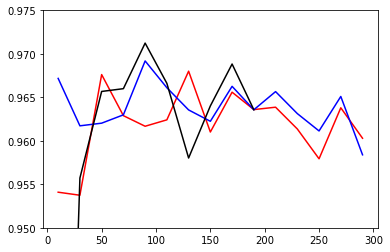

In [25]:
plt.plot(layer_range1, r2_scores1, 'r')
plt.plot(layer_range2, r2_scores2, 'b')
plt.plot(layer_range3, r2_scores3, 'k')
plt.ylim([0.95, 0.975])

### Training
Truns out the default hidden_layer_sizes=(100,) is the best...

In [19]:
regr = MLPRegressor(hidden_layer_sizes=(100,), 
                   activation="relu",
                   solver='sgd', 
                   alpha=0.0001,
                   batch_size='auto', 
                   learning_rate="adaptive",
                   learning_rate_init=0.001,
                   power_t=0.5, 
                   max_iter=100000,  # number of epochs
                   momentum=0.9,
                   random_state=1)  # random seed

nn = regr.fit(X_train, y_train)

y_predict = nn.predict(X_test)
score = r2_score(y_test, y_predict)
score

In [22]:
# number of iterations the solver has run
nn.n_iter_

NameError: name 'nn' is not defined

In [ ]:
# shape of weights
for w in nn.coefs_:
    print(w.shape)

In [ ]:
for ele in zip(y_test, y_predict):
    print(ele)

In [ ]:
# cvs = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
# print("Accuracy: %0.2f (+/- %0.2f)" % (cvs.mean(), cvs.std() * 2))

In [ ]:
pd.DataFrame(regr.loss_curve_).plot()

### Test some different data by NN

In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# regr = MLPRegressor(hidden_layer_sizes=(10, 50, 10), 
#                    activation="logistic",
#                    solver='sgd', 
#                    alpha=0.0001,
#                    batch_size='auto', 
#                    learning_rate="constant",
#                    learning_rate_init=0.001,
#                    power_t=0.5, 
#                    max_iter=1000,  # number of epochs
#                    momentum=0.9,
#                    random_state=1  # random seed
#                    ).fit(X_train, y_train)
# # regr.predict(X_test[:2])

# regr.score(X_test, y_test)

In [ ]:
# regr.predict(X_test)

In [ ]:
# pd.DataFrame(X_train).plot()

In [ ]:
# pd.DataFrame(y_train).plot()

# Dimensionality Reduction


<font color=blue size=2> Dimensionality Reduction is not the way to select features. </font>

<font color=blue size=2> Since DR make less **but new features** that is nothing related to the ones in raw data. </font>

<font color=red size=2> Use feature selction instead of DR. </font>

## PCA
Principal component analysis

In [2]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
newX = pca.fit_transform(X)
print(X)

print(newX)

print(pca.explained_variance_ratio_)


[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
[0.99244289 0.00755711]


In [3]:
pca = PCA(n_components=1)
newX = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
[ 0.99244289]

[0.99244289]


[0.99244289]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
# from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

# show all columns
pd.set_option('display.max_columns', None)
# show all rows
pd.set_option('display.max_rows', None) 

In [5]:
# wb = pd.read_excel('ML-Model.xlsx', sheet_name=None, index_col=0, comment='#')
wb = pd.read_excel('8MR-ML-Model.xlsx', sheet_name=None, index_col=0, comment='#')
wb["Cages"] = wb["Cages"].dropna(axis=0, how="all").dropna(axis=1, how="any")

In [6]:
listcage = [wb["Cages"]] * wb["NH3"].shape[1]
cages7 = pd.concat(listcage, axis=0)
NH3unstack = wb["NH3"].unstack()
cages7.index = NH3unstack.index
data = pd.concat([cages7, NH3unstack], axis=1)
data.rename(columns={0:"NH3"}, inplace=True)
y = wb["TS"].unstack()
if 'Slope' in data.columns:
    del data["Slope"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
pca = PCA(n_components=10)
X = pca.fit_transform(data)


In [11]:
data

CH2-ads  Toluene-ads  P-xylene-ads       Dia      Dfa  \
Si AEI-O1   -11.49   -83.131247    -85.794703   7.19930  3.48078   
   AEI-O2   -11.49   -83.817318    -79.107360   7.19930  3.48078   
   CHA-O2   -13.12   -82.842927    -95.613487   7.09000  3.46364   
   CHA-O1   -13.12   -81.221868    -89.834865   7.09000  3.46364   
   AFX      -11.17   -76.661133    -86.334639   7.47335  3.39522   
   LTA       -8.91   -65.214234    -62.149453  10.70251  3.90919   
   ERI      -13.99   -78.916891    -95.669316   6.68532  3.08582   
   RHO      -14.80   -70.990344    -79.258048  10.35969  3.74102   
   ANO-O2   -15.60   -91.506372    -98.272385   6.48466  2.92115   
   ANO-O1   -15.60   -86.043152   -104.133840   6.48466  2.92115   
   AVL      -12.44   -82.316750    -95.321837   6.88648  3.33242   
   EAB      -14.56   -92.445427   -101.913349   6.83509  3.25177   
   IFY-S    -12.49   -90.732398   -107.235586   6.60012  3.37442   
   IFY      -13.44   -84.007968    -99.032441   6.84934  3.59339   
   PTT      -17.59   -91.451514    -50.069352   6.53113  2.95168   
   SAS      -11.63   -72.568881    -76.452502   8.65845  3.85380   
   SAV      -11.05   -76.388016    -70.680631   8.31660  3.73314   
Ge AEI-O1   -11.49   -83.131247    -85.794703   7.19930  3.48078   
   AEI-O2   -11.49   -83.817318    -79.107360   7.19930  3.48078   
   CHA-O2   -13.12   -82.842927    -95.613487   7.09000  3.46364   
   CHA-O1   -13.12   -81.221868    -89.834865   7.09000  3.46364   
   AFX      -11.17   -76.661133    -86.334639   7.47335  3.39522   
   LTA       -8.91   -65.214234    -62.149453  10.70251  3.90919   
   ERI      -13.99   -78.916891    -95.669316   6.68532  3.08582   
   RHO      -14.80   -70.990344    -79.258048  10.35969  3.74102   
   ANO-O2   -15.60   -91.506372    -98.272385   6.48466  2.92115   
   ANO-O1   -15.60   -86.043152   -104.133840   6.48466  2.92115   
   AVL      -12.44   -82.316750    -95.321837   6.88648  3.33242   
   EAB      -14.56   -92.445427   -101.913349   6.83509  3.25177   
   IFY-S    -12.49   -90.732398   -107.235586   6.60012  3.37442   
   IFY      -13.44   -84.007968    -99.032441   6.84934  3.59339   
   PTT      -17.59   -91.451514    -50.069352   6.53113  2.95168   
   SAS      -11.63   -72.568881    -76.452502   8.65845  3.85380   
   SAV      -11.05   -76.388016    -70.680631   8.31660  3.73314   
Ti AEI-O1   -11.49   -83.131247    -85.794703   7.19930  3.48078   
   AEI-O2   -11.49   -83.817318    -79.107360   7.19930  3.48078   
   CHA-O2   -13.12   -82.842927    -95.613487   7.09000  3.46364   
   CHA-O1   -13.12   -81.221868    -89.834865   7.09000  3.46364   
   AFX      -11.17   -76.661133    -86.334639   7.47335  3.39522   
   LTA       -8.91   -65.214234    -62.149453  10.70251  3.90919   
   ERI      -13.99   -78.916891    -95.669316   6.68532  3.08582   
   RHO      -14.80   -70.990344    -79.258048  10.35969  3.74102   
   ANO-O2   -15.60   -91.506372    -98.272385   6.48466  2.92115   
   ANO-O1   -15.60   -86.043152   -104.133840   6.48466  2.92115   
   AVL      -12.44   -82.316750    -95.321837   6.88648  3.33242   
   EAB      -14.56   -92.445427   -101.913349   6.83509  3.25177   
   IFY-S    -12.49   -90.732398   -107.235586   6.60012  3.37442   
   IFY      -13.44   -84.007968    -99.032441   6.84934  3.59339   
   PTT      -17.59   -91.451514    -50.069352   6.53113  2.95168   
   SAS      -11.63   -72.568881    -76.452502   8.65845  3.85380   
   SAV      -11.05   -76.388016    -70.680631   8.31660  3.73314   
Mg AEI-O1   -11.49   -83.131247    -85.794703   7.19930  3.48078   
   AEI-O2   -11.49   -83.817318    -79.107360   7.19930  3.48078   
   CHA-O2   -13.12   -82.842927    -95.613487   7.09000  3.46364   
   CHA-O1   -13.12   -81.221868    -89.834865   7.09000  3.46364   
   AFX      -11.17   -76.661133    -86.334639   7.47335  3.39522   
   LTA       -8.91   -65.214234    -62.149453  10.70251  3.90919   
   ERI      -13.99   -78.916891    -95.669316   6.68532  3.08582   

In [13]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-5.019513,0.620595,-1.708261,-4.588258,-1.649250,0.055887,-0.185526,-0.099046,0.064504,-0.005251
1,-11.575762,5.699960,1.069097,-5.445875,-1.938413,0.061783,-0.173196,-0.105871,0.109612,-0.062206
2,-4.521627,-8.647158,-4.916369,-4.225210,0.275235,0.071771,-0.344917,0.024015,0.149273,0.066428
3,-6.711977,-3.041226,-4.153659,-3.557791,0.381959,-0.375668,-0.329753,0.033880,0.191353,0.007367
4,-7.906766,1.375470,-6.294381,-0.512955,-0.885518,-1.183629,0.061520,-0.013758,-0.142225,-0.091965
5,-20.961264,26.008138,-7.599004,5.663676,-1.482956,1.517624,-0.412011,-0.234892,-0.136326,0.044220
6,-10.246516,-9.958965,-2.678895,3.919866,1.395472,-1.186822,-0.492439,-0.012535,-0.007390,-0.121835
7,-16.492137,9.298121,-11.011074,-1.610695,3.960480,0.908096,0.591410,-0.133706,0.100407,-0.064491
8,-5.764413,-15.822410,7.593192,-1.142752,0.829817,0.678176,-0.164470,-0.178844,-0.144243,-0.003654
9,-6.607478,-20.084458,1.937757,2.471485,1.859948,-0.354812,-0.168700,-0.146384,-0.179099,0.022544


<AxesSubplot:>

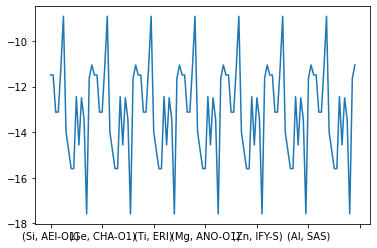

In [17]:
data.iloc[:,0].plot()

<AxesSubplot:>

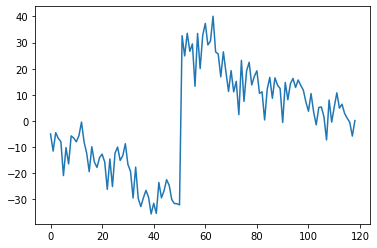

In [18]:
pd.DataFrame(X).iloc[:,0].plot()